In [1]:
import os
os.chdir("C:\\Users\\ASUS\\OneDrive\\Desktop\\PGDA\\Imarticus\\Vinod Sir\\Working Directory")

import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\PGDA\\Imarticus\\ML Project\\Farmingham Heart disease\\framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#df.isnull().sum()/df.shape[0]*100

In [7]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.dropna(how="any", axis=0, inplace= True)

In [9]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

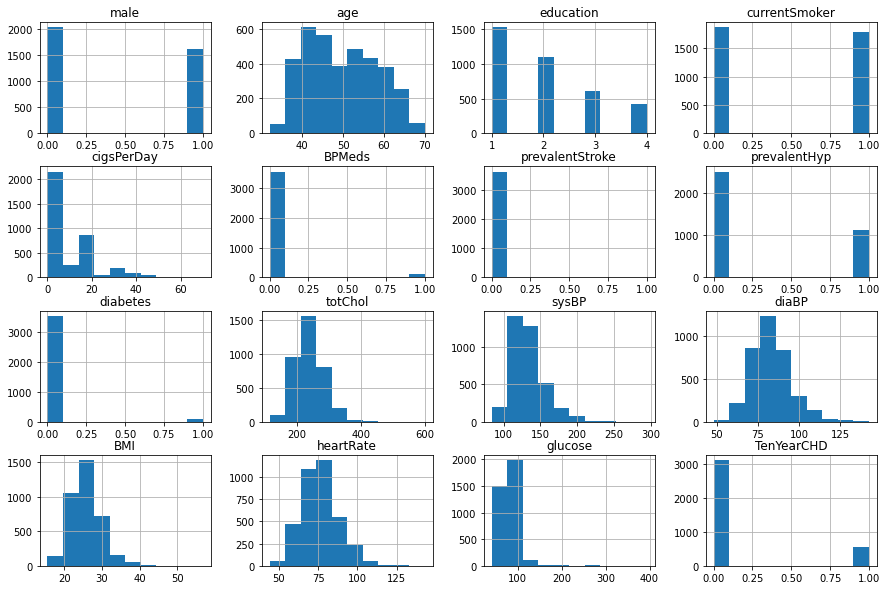

In [10]:
df.hist(figsize=(15,10))
plt.show()

<AxesSubplot:>

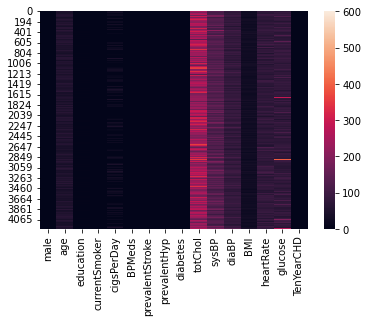

In [11]:
import seaborn as sns
sns.heatmap(df)

In [12]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [13]:
df=pd.get_dummies(df,drop_first=True, dtype = float)
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
a = df[['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'totChol', 'BMI', 'heartRate', 'glucose']]
a.values

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,  20.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,  43.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ]])

In [15]:
x = (a.values)
y = np.asanyarray(df[['diabetes']]).reshape(-1,1)

In [16]:
x

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,  20.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,  43.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ]])

In [17]:
df.shape

(3656, 16)

# EDA

# Target Variables

## TenYearCHD

In [18]:
df["TenYearCHD"].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: TenYearCHD')

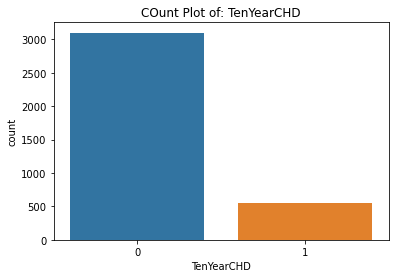

In [19]:
sns.countplot(df["TenYearCHD"])
plt.title("COunt Plot of: TenYearCHD")

# Predictors

## male

In [20]:
df["male"].value_counts()

0    2034
1    1622
Name: male, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: male')

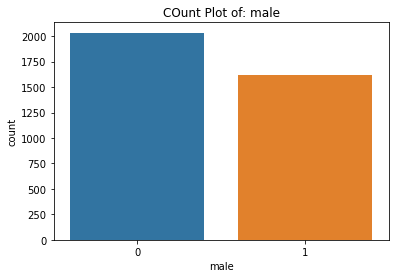

In [21]:
sns.countplot(df["male"])
plt.title("COunt Plot of: male")

In [22]:
ct_male = pd.crosstab(df.TenYearCHD, df.male)
ct = chi2_contingency(ct_male, correction = False)
ct

(30.77300519507496,
 2.9004477129831585e-08,
 1,
 array([[1724.1154267, 1374.8845733],
        [ 309.8845733,  247.1154267]]))

In [23]:
round(ct[1],4)  # p_val = 0, Ho reject, hence association exists, good predictor 

0.0

 ## age 

In [24]:
df["age"].value_counts()

40    166
46    166
42    161
48    149
39    146
41    145
44    143
45    140
43    137
52    129
38    124
50    123
51    123
55    123
54    119
49    116
53    116
47    114
57    108
56    105
59    100
60     98
58     97
63     96
62     91
61     91
64     80
37     80
36     77
65     46
67     38
66     34
35     33
68     16
34     14
33      5
69      5
32      1
70      1
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

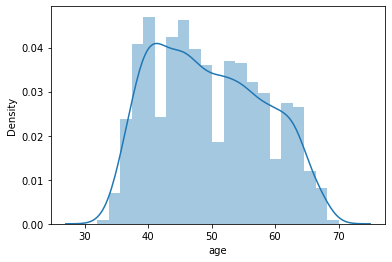

In [25]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='age'>

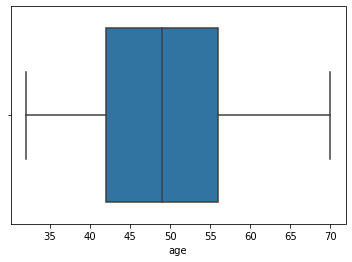

In [26]:
sns.boxplot(df['age'])

In [27]:
mod = ols('TenYearCHD ~ age', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df      sum_sq    mean_sq           F        PR(>F)
age          1.0   25.810619  25.810619  211.305943  1.389380e-46
Residual  3654.0  446.329151   0.122148         NaN           NaN


In [28]:
for i,j in aov_table.iterrows():
    print(i[0],round(j[4],4))

a 0.0
R nan


## education 

In [29]:
df["education"].value_counts()

1.0    1526
2.0    1101
3.0     606
4.0     423
Name: education, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: education')

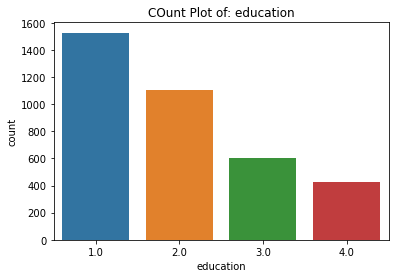

In [30]:
sns.countplot(df["education"])
plt.title("COunt Plot of: education")

In [31]:
ct_education = pd.crosstab(df.TenYearCHD, df.education)
ct = chi2_contingency(ct_education, correction = False)
ct

(31.062637414123976,
 8.246210529929311e-07,
 3,
 array([[1293.51039387,  933.26012035,  513.67450766,  358.55497812],
        [ 232.48960613,  167.73987965,   92.32549234,   64.44502188]]))

In [32]:
round(ct[1],4)  # p_val = 0, Ho reject, hence association exists, good predictor 

0.0

## currentSmoker 

In [33]:
df["currentSmoker"].value_counts()

0    1868
1    1788
Name: currentSmoker, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: currentSmoker')

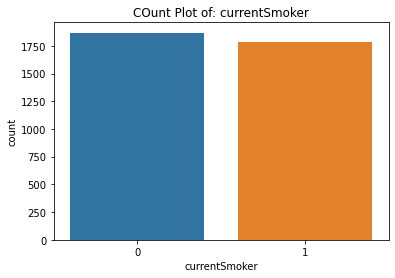

In [34]:
sns.countplot(df["currentSmoker"])
plt.title("COunt Plot of: currentSmoker")

In [35]:
ct_currentSmoker = pd.crosstab(df.TenYearCHD, df.currentSmoker)
ct = chi2_contingency(ct_currentSmoker, correction = False)
ct

(1.3444080980686755,
 0.2462580847414204,
 1,
 array([[1583.4059081, 1515.5940919],
        [ 284.5940919,  272.4059081]]))

In [36]:
round(ct[1],4)  # p_val > 0, Ho accepted, hence association doesn't exists, bad predictor -- can drop this column

0.2463

## cigsPerDay 

In [37]:
df["cigsPerDay"].value_counts()   # Continuous Data

0.0     1868
20.0     651
30.0     191
15.0     184
10.0     123
5.0       99
9.0       99
3.0       83
40.0      69
1.0       61
43.0      49
25.0      44
35.0      19
6.0       17
2.0       16
7.0       11
8.0        9
60.0       9
4.0        8
17.0       7
18.0       7
11.0       5
23.0       5
50.0       4
13.0       3
45.0       3
12.0       3
16.0       3
19.0       2
38.0       1
29.0       1
70.0       1
14.0       1
Name: cigsPerDay, dtype: int64

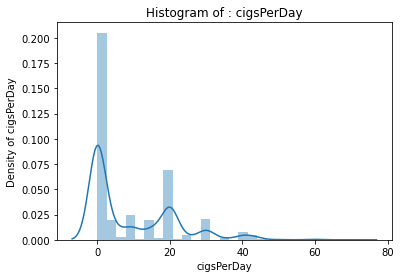

In [38]:
sns.distplot(df['cigsPerDay'])
plt.title("Histogram of : cigsPerDay")
plt.xlabel("cigsPerDay")
plt.ylabel("Density of cigsPerDay")
plt.show()

(array([2.152e+03, 2.530e+02, 8.550e+02, 4.900e+01, 1.920e+02, 8.900e+01,
        5.200e+01, 4.000e+00, 9.000e+00, 1.000e+00]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <BarContainer object of 10 artists>)

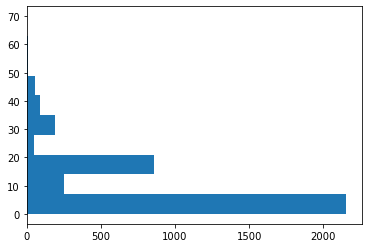

In [39]:
plt.hist(x=df.cigsPerDay, orientation="horizontal")

<AxesSubplot:xlabel='cigsPerDay'>

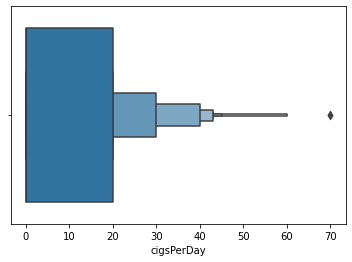

In [40]:
sns.boxenplot(x="cigsPerDay", data=df)

<AxesSubplot:xlabel='cigsPerDay'>

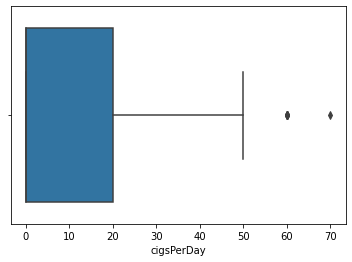

In [41]:
sns.boxplot(x="cigsPerDay", data=df)

Outliers

In [42]:
# Outliers
q1 = df['cigsPerDay'].quantile(0.25)
q3 = df['cigsPerDay'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [43]:
ul_data=df.loc[df['cigsPerDay']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
327,1,56,1.0,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0
721,1,59,1.0,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
1054,1,58,2.0,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1452,1,39,1.0,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
1468,1,50,1.0,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.0,0
1488,1,37,4.0,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
1849,1,48,1.0,1,60.0,0.0,0,0,0,252.0,104.0,73.5,23.03,70.0,77.0,0
2709,1,46,1.0,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
3008,1,40,3.0,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0
3928,1,67,2.0,1,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1


In [44]:
ll_data=df.loc[df['cigsPerDay']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [45]:
df['cigsPerDay'] = np.where(df['cigsPerDay']>ul, ul, df['cigsPerDay'])

<AxesSubplot:xlabel='cigsPerDay'>

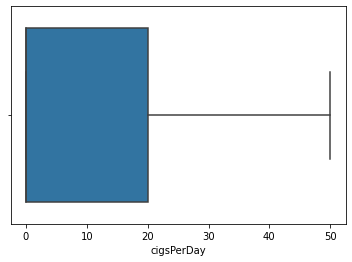

In [46]:
sns.boxplot(x="cigsPerDay", data=df)

## BPMeds 

In [47]:
df["BPMeds"].value_counts()

0.0    3545
1.0     111
Name: BPMeds, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: BPMeds')

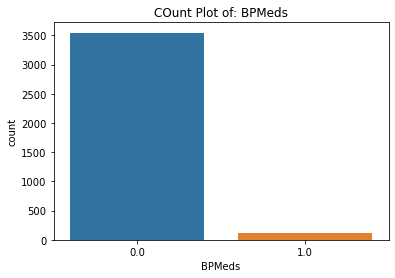

In [48]:
sns.countplot(df["BPMeds"])
plt.title("COunt Plot of: BPMeds")

In [49]:
ct_BPMeds = pd.crosstab(df.TenYearCHD, df.BPMeds)
ct = chi2_contingency(ct_BPMeds, correction = False)
ct

(29.03452113804038,
 7.109993429681265e-08,
 1,
 array([[3004.91110503,   94.08889497],
        [ 540.08889497,   16.91110503]]))

In [50]:
round(ct[1],4)  # p_val < 0.05, Ho rejected, hence association exists, good predictor 

0.0

## prevalentStroke 

In [51]:
df["prevalentStroke"].value_counts()

0    3635
1      21
Name: prevalentStroke, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: prevalentStroke')

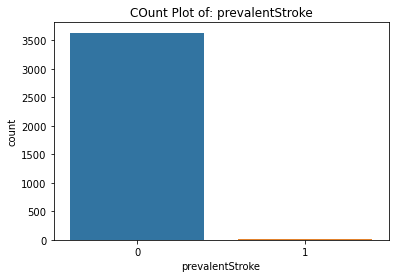

In [52]:
sns.countplot(df["prevalentStroke"])
plt.title("COunt Plot of: prevalentStroke")

In [53]:
ct_prevalentStroke = pd.crosstab(df.TenYearCHD, df.prevalentStroke)
ct = chi2_contingency(ct_prevalentStroke, correction = False)
ct

(8.546916048696806,
 0.0034610809460219154,
 1,
 array([[3081.19939825,   17.80060175],
        [ 553.80060175,    3.19939825]]))

In [54]:
round(ct[1],4)  # p_val < 0.05, Ho rejected, hence association exists, good predictor 

0.0035

## prevalentHyp 

In [55]:
df["prevalentHyp"].value_counts()

0    2517
1    1139
Name: prevalentHyp, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: prevalentStroke')

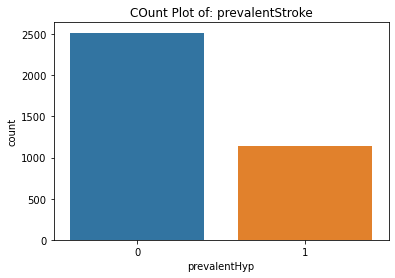

In [56]:
sns.countplot(df["prevalentHyp"])
plt.title("COunt Plot of: prevalentStroke")

In [59]:
ct_prevalentHyp = pd.crosstab(df.TenYearCHD, df.prevalentHyp)
ct = chi2_contingency(ct_prevalentHyp, correction = False)
ct

(120.51173022673483,
 4.887691593190609e-28,
 1,
 array([[2133.52926696,  965.47073304],
        [ 383.47073304,  173.52926696]]))

In [60]:
round(ct[1],4)  # p_val < 0.05, Ho rejected, hence association exists, good predictor 

0.0

## diabetes 

In [61]:
df["diabetes"].value_counts()

0    3557
1      99
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'COunt Plot of: diabetes')

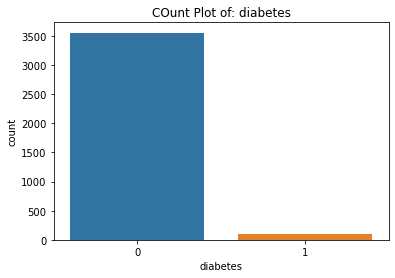

In [62]:
sns.countplot(df["diabetes"])
plt.title("COunt Plot of: diabetes")

In [63]:
ct_diabetes = pd.crosstab(df.TenYearCHD, df.diabetes)
ct = chi2_contingency(ct_diabetes, correction = False)
ct

(31.891571532290488,
 1.6302300205658096e-08,
 1,
 array([[3015.08287746,   83.91712254],
        [ 541.91712254,   15.08287746]]))

In [64]:
round(ct[1],4)  # p_val < 0.05, Ho rejected, hence association exists, good predictor 

0.0

## totChol 

In [70]:
df["totChol"].value_counts()

240.0    69
260.0    58
220.0    58
232.0    54
210.0    51
         ..
366.0     1
405.0     1
359.0     1
336.0     1
119.0     1
Name: totChol, Length: 241, dtype: int64

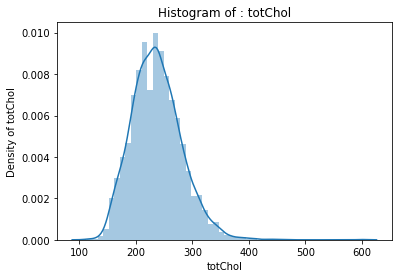

In [71]:
sns.distplot(df['totChol'])
plt.title("Histogram of : totChol")
plt.xlabel("totChol")
plt.ylabel("Density of totChol")
plt.show()

<AxesSubplot:>

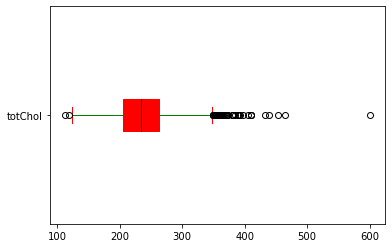

In [72]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['totChol'].plot.box(color=props2, patch_artist = True, vert = False)

In [73]:
# Outliers
q1 = df['totChol'].quantile(0.25)
q3 = df['totChol'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [75]:
ul_data=df.loc[df['totChol']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
194,0,42,3.0,0,0.0,0.0,0,0,0,464.0,128.0,87.0,22.90,72.0,72.0,1
259,0,60,1.0,0,0.0,0.0,0,1,0,352.0,197.5,105.0,36.29,75.0,95.0,1
333,0,55,2.0,0,0.0,1.0,0,1,0,368.0,204.0,94.0,25.20,100.0,81.0,0
533,0,53,2.0,0,0.0,0.0,0,0,0,370.0,123.0,83.0,24.64,63.0,74.0,1
543,1,47,2.0,1,18.0,0.0,0,1,0,439.0,145.0,74.0,22.42,100.0,90.0,1
617,0,51,3.0,1,3.0,0.0,0,1,0,398.0,161.0,96.0,23.63,77.0,83.0,0
670,0,65,2.0,0,0.0,0.0,0,0,0,355.0,138.0,79.0,28.38,75.0,108.0,0
920,0,60,1.0,1,15.0,0.0,0,0,0,353.0,116.0,82.0,22.66,85.0,71.0,0
926,1,61,1.0,1,20.0,0.0,0,1,0,360.0,157.0,99.0,28.74,95.0,73.0,0
1103,0,60,4.0,1,20.0,0.0,0,1,0,352.0,149.0,73.0,25.96,80.0,79.0,0


In [76]:
ll_data=df.loc[df['totChol']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2525,1,38,1.0,1,20.0,0.0,0,0,0,113.0,120.0,83.5,30.34,78.0,85.0,0
4066,1,47,2.0,1,20.0,0.0,0,0,0,119.0,117.0,78.5,26.40,75.0,78.0,0


In [77]:
df['totChol'] = np.where(df['totChol']>ul, ul, df['totChol'])
df['totChol'] = np.where(df['totChol']<ll, ll, df['totChol'])

<AxesSubplot:>

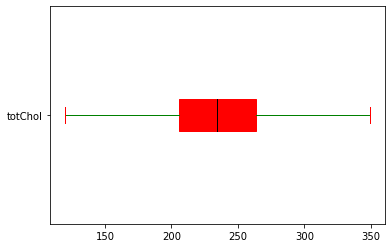

In [78]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['totChol'].plot.box(color=props2, patch_artist = True, vert = False)

## sysBP 

In [203]:
df["sysBP"].value_counts()

130.0    90
120.0    87
110.0    83
125.0    79
115.0    75
         ..
169.5     1
98.5      1
181.5     1
243.0     1
185.5     1
Name: sysBP, Length: 231, dtype: int64

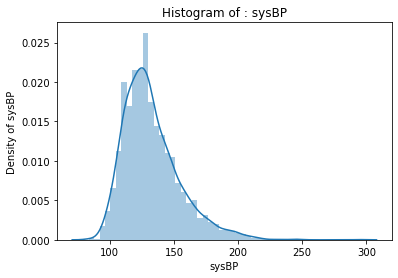

In [79]:
sns.distplot(df['sysBP'])
plt.title("Histogram of : sysBP")
plt.xlabel("sysBP")
plt.ylabel("Density of sysBP")
plt.show()

<AxesSubplot:>

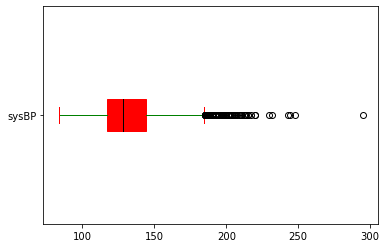

In [80]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['sysBP'].plot.box(color=props2, patch_artist = True, vert = False)

In [81]:
# Outliers
q1 = df['sysBP'].quantile(0.25)
q3 = df['sysBP'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [82]:
ul_data=df.loc[df['sysBP']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
87,0,61,2.0,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
108,0,66,1.0,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1
153,0,66,1.0,0,0.0,0.0,0,1,0,214.0,212.0,104.0,25.32,57.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1,51,3.0,0,0.0,0.0,0,1,0,268.0,206.0,116.0,26.35,98.0,70.0,1
4173,0,54,2.0,0,0.0,0.0,0,1,0,302.0,210.0,127.5,31.98,68.0,79.0,0
4193,0,63,1.0,0,0.0,0.0,0,1,0,306.0,195.0,105.0,27.96,75.0,87.0,1
4222,1,53,3.0,0,0.0,0.0,0,1,0,289.0,188.0,110.0,26.70,70.0,63.0,0


In [83]:
ll_data=df.loc[df['sysBP']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [84]:
df['sysBP'] = np.where(df['sysBP']>ul, ul, df['sysBP'])
df['sysBP'] = np.where(df['sysBP']<ll, ll, df['sysBP'])

<AxesSubplot:>

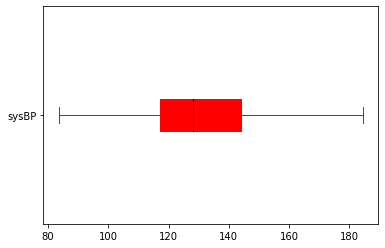

In [85]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['sysBP'].plot.box(color=props2, patch_artist = True, vert = False)

## diaBP 

In [204]:
df["diaBP"].value_counts()

80.0     217
82.0     138
85.0     119
70.0     114
81.0     114
        ... 
114.5      1
140.0      1
105.5      1
116.5      1
127.5      1
Name: diaBP, Length: 142, dtype: int64

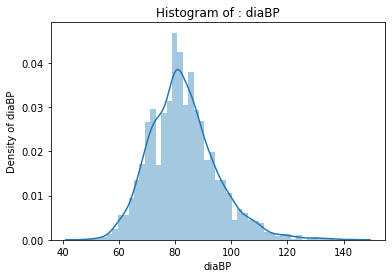

In [86]:
sns.distplot(df['diaBP'])
plt.title("Histogram of : diaBP")
plt.xlabel("diaBP")
plt.ylabel("Density of diaBP")
plt.show()

<AxesSubplot:>

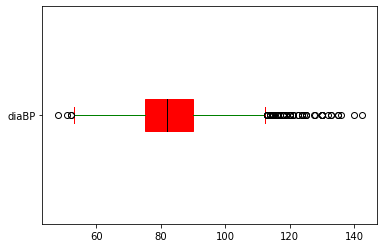

In [87]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['diaBP'].plot.box(color=props2, patch_artist = True, vert = False)

In [88]:
# Outliers
q1 = df['diaBP'].quantile(0.25)
q3 = df['diaBP'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [89]:
ul_data=df.loc[df['diaBP']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
46,0,65,1.0,0,0.0,0.0,0,1,0,252.0,179.5,114.0,30.47,90.0,87.0,0
158,0,49,3.0,0,0.0,1.0,0,1,0,254.0,184.5,124.5,28.35,78.0,54.0,0
249,0,60,1.0,1,20.0,0.0,0,0,1,180.0,184.5,122.5,44.27,88.0,150.0,0
409,1,44,1.0,1,10.0,0.0,0,1,0,229.0,177.5,120.0,39.88,104.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,1,63,4.0,1,25.0,0.0,0,1,0,203.0,184.5,125.0,26.18,80.0,83.0,1
4076,0,61,1.0,0,0.0,1.0,0,1,1,265.0,184.5,125.0,29.50,68.0,256.0,1
4123,1,51,3.0,0,0.0,0.0,0,1,0,268.0,184.5,116.0,26.35,98.0,70.0,1
4173,0,54,2.0,0,0.0,0.0,0,1,0,302.0,184.5,127.5,31.98,68.0,79.0,0


In [90]:
ll_data=df.loc[df['diaBP']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1997,0,58,1.0,0,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1
3328,1,48,3.0,0,0.0,0.0,0,0,0,175.0,131.0,52.0,24.95,75.0,77.0,0
3641,0,58,1.0,0,0.0,0.0,0,0,0,240.0,126.0,52.0,25.66,75.0,63.0,0
3645,1,68,1.0,1,15.0,0.0,0,0,0,157.0,106.0,48.0,26.73,65.0,65.0,1


In [91]:
df['diaBP'] = np.where(df['diaBP']>ul, ul, df['diaBP'])
df['diaBP'] = np.where(df['diaBP']<ll, ll, df['diaBP'])

<AxesSubplot:>

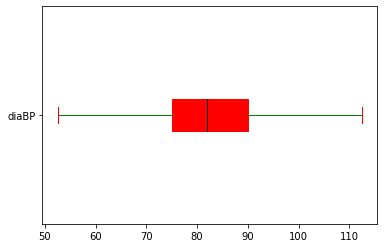

In [92]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['diaBP'].plot.box(color=props2, patch_artist = True, vert = False)

## BMI 

In [205]:
df["BMI"].value_counts()

23.48    18
22.54    16
22.91    15
25.09    14
22.19    14
         ..
22.28     1
29.05     1
33.38     1
32.81     1
19.71     1
Name: BMI, Length: 1297, dtype: int64

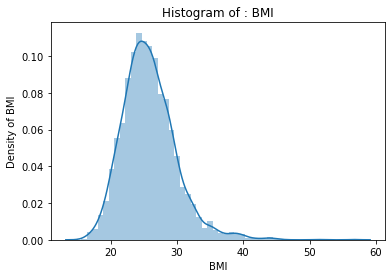

In [93]:
sns.distplot(df['BMI'])
plt.title("Histogram of : BMI")
plt.xlabel("BMI")
plt.ylabel("Density of BMI")
plt.show()

<AxesSubplot:>

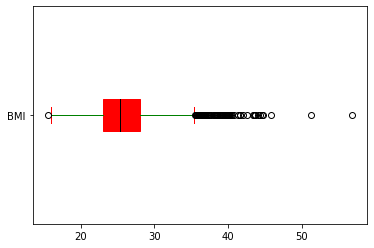

In [94]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['BMI'].plot.box(color=props2, patch_artist = True, vert = False)

In [95]:
# Outliers
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [96]:
ul_data=df.loc[df['BMI']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
35,1,37,2.0,0,0.0,0.0,0,1,0,225.000,124.5,92.5,38.53,95.0,83.0,0
37,1,52,1.0,0,0.0,0.0,0,1,1,178.000,160.0,98.0,40.11,75.0,225.0,0
78,0,45,1.0,0,0.0,0.0,0,1,0,183.000,151.0,101.0,45.80,80.0,63.0,0
87,0,61,2.0,1,1.0,0.0,0,1,0,326.000,184.5,104.0,38.46,57.0,78.0,0
108,0,66,1.0,0,0.0,0.0,0,1,0,278.000,184.5,88.0,40.52,90.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,0,58,1.0,0,0.0,0.0,0,1,0,349.125,165.0,95.0,41.66,82.0,91.0,0
4132,0,57,1.0,0,0.0,0.0,0,1,0,259.000,170.0,101.0,38.17,85.0,75.0,0
4190,0,41,1.0,0,0.0,0.0,0,1,0,229.000,150.0,89.0,36.07,75.0,92.0,0
4215,0,63,1.0,0,0.0,0.0,0,1,1,236.000,155.0,82.0,39.17,78.0,79.0,0


In [97]:
ll_data=df.loc[df['BMI']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
377,1,67,1.0,0,0.0,0.0,0,0,0,203.0,122.0,74.0,15.54,96.0,79.0,0


In [98]:
df['BMI'] = np.where(df['BMI']>ul, ul, df['BMI'])
df['BMI'] = np.where(df['BMI']<ll, ll, df['BMI'])

<AxesSubplot:>

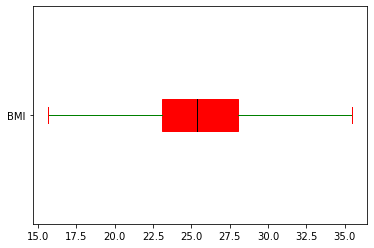

In [99]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['BMI'].plot.box(color=props2, patch_artist = True, vert = False)

## heartRate 

In [206]:
df["heartRate"].value_counts()

75.0     507
80.0     336
70.0     269
60.0     207
85.0     191
        ... 
97.0       1
130.0      1
47.0       1
44.0       1
46.0       1
Name: heartRate, Length: 72, dtype: int64

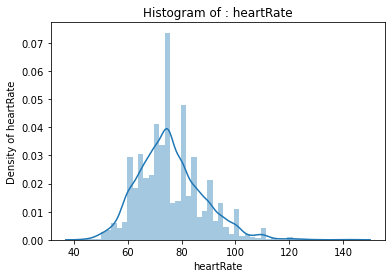

In [100]:
sns.distplot(df['heartRate'])
plt.title("Histogram of : heartRate")
plt.xlabel("heartRate")
plt.ylabel("Density of heartRate")
plt.show()

<AxesSubplot:>

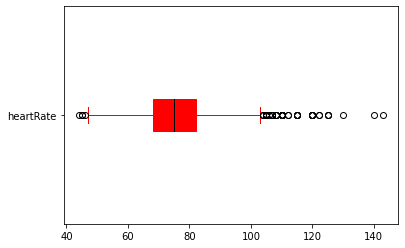

In [101]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['heartRate'].plot.box(color=props2, patch_artist = True, vert = False)

In [102]:
# Outliers
q1 = df['heartRate'].quantile(0.25)
q3 = df['heartRate'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [103]:
ul_data=df.loc[df['heartRate']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
162,0,47,2.0,0,0.0,0.0,0,0,0,174.0,118.0,86.5,26.15,110.0,86.0,0
270,0,54,1.0,0,0.0,0.0,0,1,0,273.0,139.0,98.0,29.06,110.0,73.0,1
339,0,64,1.0,0,0.0,0.0,0,1,0,312.0,160.0,82.0,27.59,140.0,94.0,0
358,0,40,3.0,1,20.0,0.0,0,0,0,210.0,118.0,79.0,21.21,130.0,84.0,0
409,1,44,1.0,1,10.0,0.0,0,1,0,229.0,177.5,112.5,35.48,104.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,1,43,4.0,1,20.0,0.0,0,0,0,184.0,127.5,81.0,28.31,108.0,75.0,0
3964,0,39,3.0,0,0.0,0.0,0,0,0,213.0,125.0,87.0,16.73,110.0,75.0,0
4053,0,44,1.0,0,0.0,0.0,0,0,0,160.0,107.0,69.0,18.63,125.0,78.0,0
4070,0,40,3.0,0,0.0,0.0,0,1,0,202.0,158.0,103.0,28.35,125.0,80.0,0


In [104]:
ll_data=df.loc[df['heartRate']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1233,1,59,1.0,0,0.0,0.0,0,0,0,229.0,100.5,66.0,25.18,44.0,81.0,0
1844,1,35,3.0,1,15.0,0.0,0,0,0,196.0,107.5,66.5,22.64,45.0,79.0,0
3740,1,36,2.0,0,0.0,0.0,0,0,0,230.0,122.0,78.0,26.53,45.0,78.0,0
4195,0,40,2.0,1,9.0,0.0,0,0,0,207.0,124.0,78.0,22.90,46.0,66.0,0


In [105]:
df['heartRate'] = np.where(df['heartRate']>ul, ul, df['heartRate'])
df['heartRate'] = np.where(df['heartRate']<ll, ll, df['heartRate'])

<AxesSubplot:>

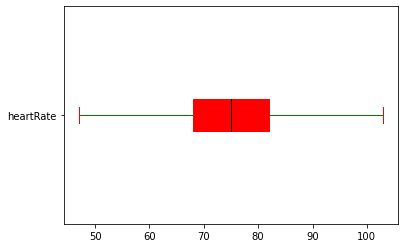

In [106]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['heartRate'].plot.box(color=props2, patch_artist = True, vert = False)

## glucose

In [207]:
df["glucose"].value_counts()

75.0     180
77.0     166
70.0     150
73.0     146
83.0     145
        ... 
145.0      1
386.0      1
155.0      1
147.0      1
260.0      1
Name: glucose, Length: 138, dtype: int64

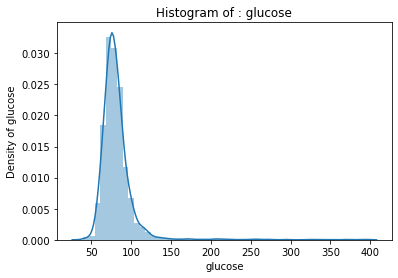

In [107]:
sns.distplot(df['glucose'])
plt.title("Histogram of : glucose")
plt.xlabel("glucose")
plt.ylabel("Density of glucose")
plt.show()

<AxesSubplot:>

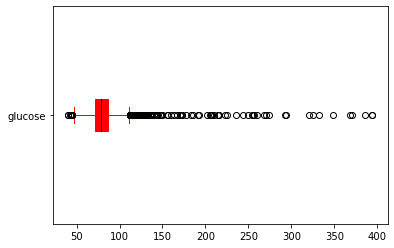

In [108]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['glucose'].plot.box(color=props2, patch_artist = True, vert = False)

In [109]:
# Outliers
q1 = df['glucose'].quantile(0.25)
q3 = df['glucose'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [110]:
ul_data=df.loc[df['glucose']>ul]
ul_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
22,0,52,1.0,0,0.0,0.0,0,0,0,234.0,148.0,78.0,34.17,70.0,113.0,0
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,35.48,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,184.5,92.0,21.51,76.0,215.0,1
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,184.5,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,0,63,2.0,0,0.0,0.0,0,1,0,250.0,184.5,88.0,24.16,94.0,118.0,1
4118,0,37,2.0,0,0.0,0.0,0,0,0,160.0,137.0,82.0,21.03,94.0,113.0,0
4203,1,63,1.0,1,10.0,0.0,0,0,1,240.0,146.0,84.0,30.48,75.0,120.0,0
4209,1,65,2.0,0,0.0,0.0,0,0,0,286.0,135.0,80.0,28.06,70.0,116.0,0


In [111]:
ll_data=df.loc[df['glucose']<ll]
ll_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
65,0,63,1.0,0,0.0,0.0,0,1,0,252.0,154.0,87.0,28.60,72.0,45.0,0
796,0,59,2.0,1,15.0,0.0,0,1,0,167.0,156.0,104.0,15.96,72.0,45.0,1
1183,0,57,1.0,0,0.0,0.0,0,1,0,233.0,184.0,106.0,35.48,66.0,40.0,1
1419,1,42,3.0,1,20.0,0.0,0,0,0,231.0,123.0,87.0,21.48,75.0,44.0,0
2225,1,38,4.0,0,0.0,0.0,0,0,0,240.0,122.5,80.0,23.97,60.0,43.0,0
2854,1,59,1.0,1,40.0,0.0,0,1,0,188.0,111.0,72.0,21.48,75.0,44.0,0
3269,1,42,1.0,1,5.0,0.0,0,0,0,197.0,102.0,70.5,24.68,83.0,45.0,0
3473,1,43,2.0,0,0.0,0.0,0,1,0,245.0,144.5,95.0,27.15,70.0,45.0,0
3975,1,43,2.0,1,43.0,0.0,0,0,0,240.0,126.0,79.0,21.38,88.0,40.0,0


In [112]:
df['glucose'] = np.where(df['glucose']>ul, ul, df['glucose'])
df['glucose'] = np.where(df['glucose']<ll, ll, df['glucose'])

<AxesSubplot:>

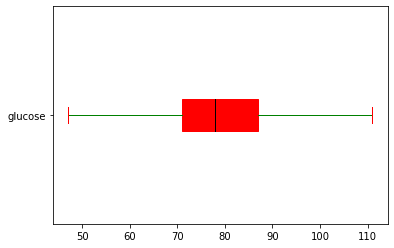

In [113]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['glucose'].plot.box(color=props2, patch_artist = True, vert = False)

# ------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [123]:
solvers = ('liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs')

In [124]:
M_and_scores = {}
sc=[]
for i in solvers:
    model = LogisticRegression(solver=i, random_state=0)
    model.fit(X_train, y_train)
    M_and_scores[i]=model.score(X_test,y_test)
    sc.append(model.score(X_test,y_test))
    
M_and_scores

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\sit

{'liblinear': 0.9908864954432477,
 'newton-cg': 0.9917149958574979,
 'sag': 0.9892294946147473,
 'saga': 0.9892294946147473,
 'lbfgs': 0.9925434962717481}

In [125]:
for k, i in M_and_scores.items():
    if i == max(M_and_scores.values()) :
        Best_Solver = k
        
print('Best Solver :' , Best_Solver, "With the Score -", max(M_and_scores.values()))

Best Solver : lbfgs With the Score - 0.9925434962717481


In [126]:
model = LogisticRegression(solver = Best_Solver, random_state = 0)
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [129]:
Y_PRED = model.predict(X_test)

In [217]:
model.score(X_train,y_train)

0.9840751327072275

In [218]:
model.score(X_test,y_test)

0.9925434962717481

In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [220]:
confusion_matrix(y_test,Y_PRED)

array([[1179,    0],
       [   9,   19]], dtype=int64)

In [221]:
print(classification_report(y_test,Y_PRED))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1179
           1       1.00      0.68      0.81        28

    accuracy                           0.99      1207
   macro avg       1.00      0.84      0.90      1207
weighted avg       0.99      0.99      0.99      1207



# With Smote

In [130]:
# X_train, X_test, y_train, y_test

from imblearn.over_sampling import SMOTE

SM = SMOTE(random_state = 6)

SM_x, SM_y = SM.fit_resample(x, y)

In [131]:
count0 = 0
count1 = 0

for i in SM_y:
    if i == 0:
        count0 += 1
    if i == 1:
        count1 += 1
        
print("number of 1s:", count1, "number of 0s:", count0)

number of 1s: 3557 number of 0s: 3557


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(SM_x, SM_y, test_size=0.33, random_state=42)

In [133]:
solvers = ('liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs')

In [134]:
M_and_scores1 = {}
for i in solvers:
    model = LogisticRegression(solver=i, random_state=0)
    model.fit(X_train1, y_train1)
    M_and_scores1[i]=model.score(X_test1,y_test1)
        
M_and_scores1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'liblinear': 0.8662691652470187,
 'newton-cg': 0.8624361158432708,
 'sag': 0.8530664395229983,
 'saga': 0.8539182282793867,
 'lbfgs': 0.8645655877342419}

In [135]:
for k, i in M_and_scores1.items():
    if i == max(M_and_scores1.values()) :
        Best_Solver1 = k
        
print('Best Solver :' , Best_Solver1, "with the score - ", max(M_and_scores1.values()))

Best Solver : liblinear with the score -  0.8662691652470187


In [136]:
model1 = LogisticRegression(solver=Best_Solver1, random_state=0)
model1.fit(X_train1, y_train1)

LogisticRegression(random_state=0, solver='liblinear')

In [139]:
Y_PRED1 = model.predict(X_test1)

In [140]:
model1.score(X_train1,y_train1)

0.870960973562736

In [141]:
model1.score(X_test1,y_test1)

0.8662691652470187

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [143]:
confusion_matrix(y_test1,Y_PRED1)

array([[1063,  123],
       [ 195,  967]], dtype=int64)

In [144]:
print(classification_report(y_test1,Y_PRED1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1186
           1       0.89      0.83      0.86      1162

    accuracy                           0.86      2348
   macro avg       0.87      0.86      0.86      2348
weighted avg       0.87      0.86      0.86      2348



# ------------------------------------------------------------------------------------------------------------

# GLM method for Logistics

In [145]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [146]:
GLM = smf.glm(formula="TenYearCHD~male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose", data=df)
result = GLM.fit()

In [147]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                            GLM   Df Residuals:                     3640
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.11724
Method:                          IRLS   Log-Likelihood:                -1261.2
Date:                Thu, 20 Apr 2023   Deviance:                       426.75
Time:                        02:06:48   Pearson chi2:                     427.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1005
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5220      0.086     -6.101      0.000      -0.690      -0.354
male                0.0566      0.013      4.506      0.000       0.032       0.081
age                 0.0073      0.001      9.370      0.000       0.006       0.009
education          -0.0055      0.006     -0.969      0.332      -0.017       0.006
currentSmoker       0.0044      0.018      0.240      0.810      -0.032       0.041
cigsPerDay          0.0023      0.001      2.893      0.004       0.001       0.004
BPMeds              0.0550      0.035      1.584      0.113      -0.013       0.123
prevalentStroke     0.1370      0.076      1.812      0.070      -0.011       0.285
prevalentHyp        0.0315      0.018      1.760      0.078      -0.004       0.067
diabetes            0.1186      0.037      3.207      0.001       0.046       0.191
totChol          7.989e-05      0.000      0.567      0.571      -0.000       0.000
sysBP               0.0025      0.001      4.714      0.000       0.001       0.004
diaBP              -0.0013      0.001     -1.559      0.119      -0.003       0.000
BMI             -1.363e-05      0.002     -0.008      0.993      -0.003       0.003
heartRate          -0.0002      0.001     -0.453      0.650      -0.001       0.001
glucose             0.0005      0.000      0.970      0.332      -0.000       0.001
===================================================================================
"""

# ------------------------------------------------------------------------------------------------------------

# Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [241]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(SM_x, SM_y, test_size=0.3, random_state=42)

In [242]:
# Create a decision tree classifier object
clf = DecisionTreeClassifier()

In [243]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
# Make predictions on the testing set
y_train_pred = clf.predict(X_train)

In [245]:
# Calculate the accuracy of the model
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 100.00%


In [246]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [247]:
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 97.85%


## for the right Depth:

Using Grid Search

In [248]:
from sklearn.model_selection import GridSearchCV

In [249]:
# Create a decision tree classifier object
clf = DecisionTreeClassifier()

In [250]:
# Define the parameter grid
param_grid = {'max_depth': range(1, 20)}

In [251]:
# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
grid_search.fit(SM_x, SM_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)})

In [252]:
# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 19}


Using For Loop Search

In [253]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(SM_x, SM_y, test_size=0.3, random_state=42)

In [254]:
# Define the range of depth values
depth_values = range(1, 15)

In [255]:
# Initialize empty lists to store training and testing scores
train_scores = []
test_scores = []

In [256]:
# Loop over depth values and fit the model
for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

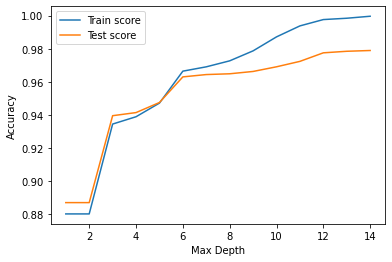

In [257]:
# Plot the training and testing scores
plt.plot(depth_values, train_scores, label='Train score')
plt.plot(depth_values, test_scores, label='Test score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [258]:
# Decision Tree with the right depth - 14

In [259]:
# Initialize a decision tree classifier with a maximum depth of 3
clf_rt_depth = DecisionTreeClassifier(max_depth=14)

# Train the classifier on the data
clf_rt_depth.fit(X_train, y_train)
train_new_scores = clf.score(X_train, y_train)
test_new_scores = clf.score(X_test, y_test)

In [260]:
train_new_scores

0.9995983129142398

In [261]:
test_new_scores

0.9789227166276346

In [262]:
Y_PRED2 = clf.predict(X_test)
confusion_matrix(y_test,Y_PRED2)

array([[1063,   22],
       [  23, 1027]], dtype=int64)

In [263]:
print(classification_report(y_test,Y_PRED2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1085
           1       0.98      0.98      0.98      1050

    accuracy                           0.98      2135
   macro avg       0.98      0.98      0.98      2135
weighted avg       0.98      0.98      0.98      2135



# ------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------

# Random Forest

### Random State Method

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
# Initialize a random forest classifier and train it on the data
rf = RandomForestClassifier(n_estimators=500, max_depth=14, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=500, random_state=42)

In [266]:
# Make a prediction for a new input
y_pred_rf = rf.predict(X_test)

In [267]:
train_new_scores = rf.score(X_train, y_train)
test_new_scores = rf.score(X_test, y_test)

In [268]:
train_new_scores

1.0

In [269]:
test_new_scores

0.9896955503512881

In [270]:
confusion_matrix(y_test,y_pred_rf)

array([[1078,    7],
       [  15, 1035]], dtype=int64)

In [271]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1085
           1       0.99      0.99      0.99      1050

    accuracy                           0.99      2135
   macro avg       0.99      0.99      0.99      2135
weighted avg       0.99      0.99      0.99      2135



### Grid Search Method

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [273]:
# Define the hyperparameters to search over
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'max_depth': [5, 10, 14],
              'min_samples_leaf': [1, 2, 4]}

In [274]:
# Initialize a random forest classifier
rf_g = RandomForestClassifier(random_state=42)

In [275]:
# Define the scoring metric as accuracy
scoring = {'accuracy': make_scorer(accuracy_score)}

In [276]:
# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(rf_g, param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(SM_x, SM_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 14],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score)})

In [277]:
# Print the best hyperparameters and the corresponding accuracy
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

Best Hyperparameters: {'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Accuracy: 0.9879120694477802


In [278]:
# Print the accuracy of all models tested during the grid search
cv_results = grid_search.cv_results_
for mean_score, std_score, params in zip(cv_results['mean_test_accuracy'], cv_results['std_test_accuracy'], cv_results['params']):
    print('Accuracy: %0.4f (+/-%0.4f) for %r' % (mean_score, std_score * 2, params))

Accuracy: 0.9493 (+/-0.0131) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
Accuracy: 0.9511 (+/-0.0101) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Accuracy: 0.9526 (+/-0.0115) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}
Accuracy: 0.9522 (+/-0.0108) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 300}
Accuracy: 0.9519 (+/-0.0112) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 400}
Accuracy: 0.9521 (+/-0.0114) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 500}
Accuracy: 0.9505 (+/-0.0115) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 50}
Accuracy: 0.9509 (+/-0.0107) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}
Accuracy: 0.9523 (+/-0.0116) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}
Accuracy: 0.9525 (+/-0.0112) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 300}
Accuracy: 0.9518 (+/-0.0110) for {'max_depth': 5, 'min_samples

# ------------------------------------------------------------------------------------------------------------

# KNN Method

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [280]:
# Create a list of K values to test
k_values = list(range(1, 31, 2))

In [281]:
# Use cross-validation to evaluate the performance of KNN for each K value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, SM_x, SM_y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

In [282]:
# Find the optimal K value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with an accuracy of {max(cv_scores)}")

The optimal number of neighbors is 1 with an accuracy of 0.9614846706656666


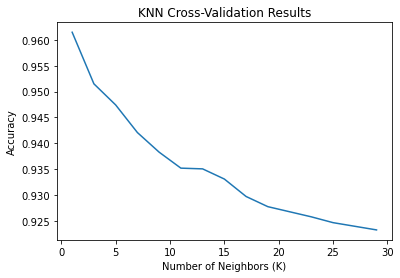

In [283]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Cross-Validation Results')
plt.show()

# ------------------------------------------------------------------------------------------------------------